In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#основная таблица
flights = pd.read_csv('flights.csv', index_col = 0)
#погода
weather = pd.read_csv('weather.csv', index_col = 0)

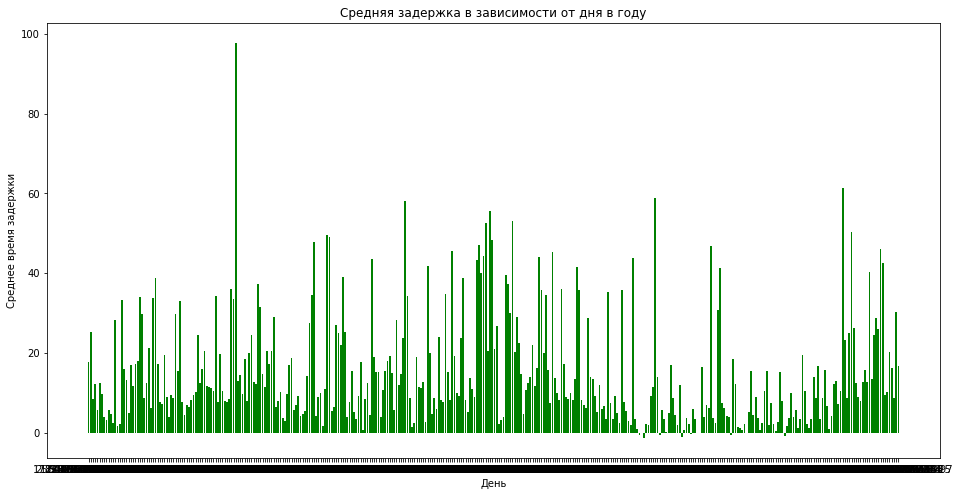

In [156]:
#1) средняя задержка в день за год

plt.figure(figsize=(16,8))
a=flights.groupby(['month', 'day'])['dep_delay'].mean()
plt.bar(range(364), a, color = 'green')
plt.xticks(range(364),a)
plt.title('Средняя задержка в зависимости от дня в году')
plt.xlabel('День')
plt.ylabel('Среднее время задержки')
plt.show()

In [157]:
#Вывод1: средняя задержка в день в году колеблется от 0 до 100. 
#Но как правило она не превышает примерно 60 минут.

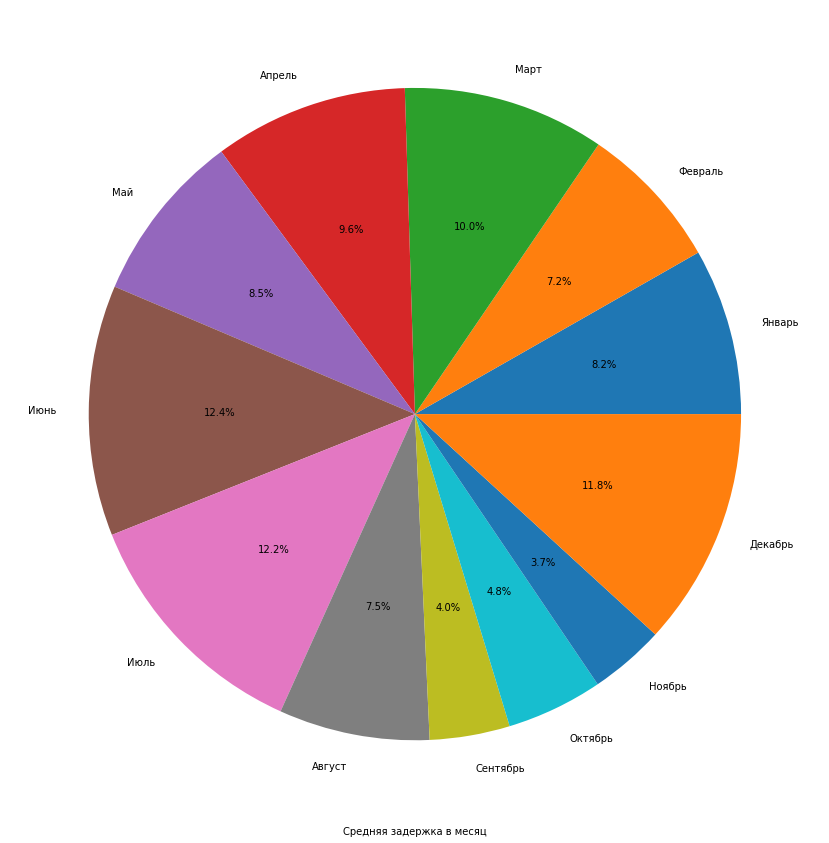

In [158]:
#2) средняя задержка по месяцам за год

labels = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
plt.figure(figsize=(15,15))
mont = flights.groupby('month')['dep_delay'].mean()
plt.pie(mont, labels = labels, autopct='%1.1f%%')
plt.xlabel('Средняя задержка в месяц')
plt.show()

In [ ]:
#Вывод2: максимальная средняя задержка наблюдается летом: июнь, июль, а также в декабре.

Text(0, 0.5, 'Среднее время задержки')

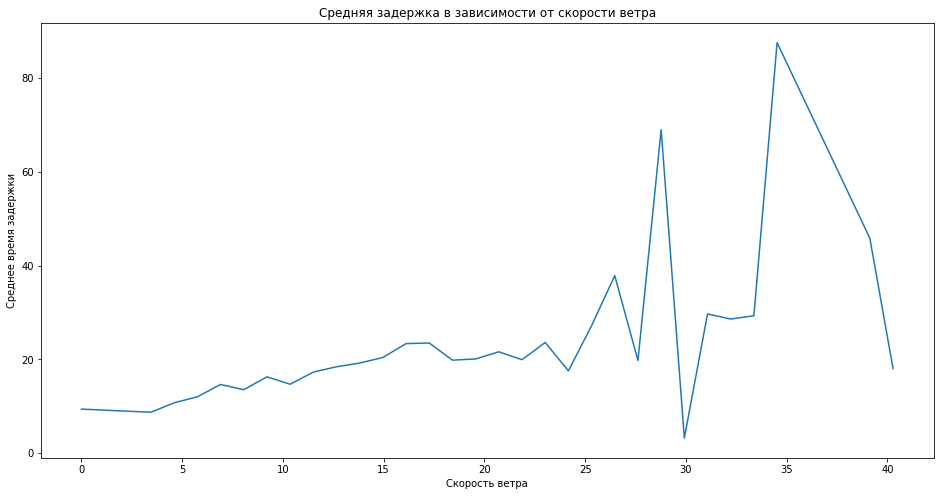

In [160]:
#3) задержка в зависимости от скорости ветра
#объединяю таблицы для удобства
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

plt.figure(figsize=(16,8))
flights['wind_speed'] = flights.wind_speed  
wind_delay = flights.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.plot(wind_delay.index, wind_delay)
plt.title('Средняя задержка в зависимости от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Среднее время задержки')


In [ ]:
#Вывод3: видно, что с увеличением скорости ветра, время задержки также увеличивается.

Text(0, 0.5, 'Среднее время задержки')

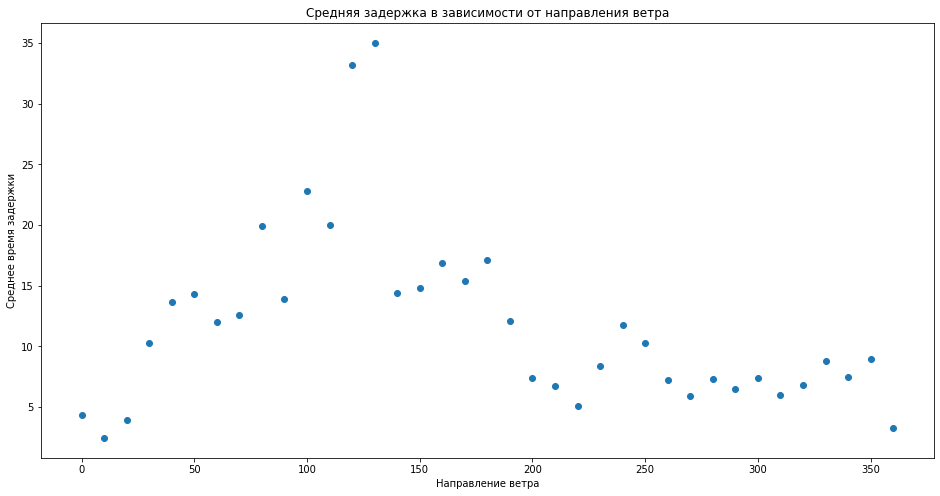

In [55]:
#4) задержка в зависимости от направления ветра
plt.figure(figsize=(16,8))
flights['wind_dir'] = flights.wind_dir
wind_dir_delay = flights.groupby('wind_dir').mean()['arr_delay']
wind_dir_delay = wind_dir_delay.sort_index()
plt.scatter(wind_dir_delay.index, wind_dir_delay)
plt.title('Средняя задержка в зависимости от направления ветра')
plt.xlabel('Направление ветра')
plt.ylabel('Среднее время задержки')

In [ ]:
#Вывод4: максимальная задержка при направлении ветра примерно 130 градусов(юго-восток).

Text(0, 0.5, 'Средняя задержка')

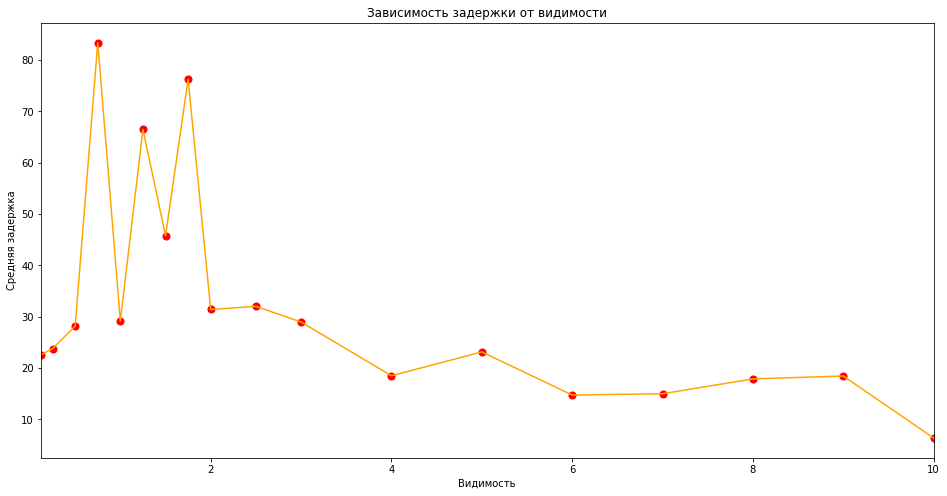

In [78]:
#5) задержка в зависимости от видимости
#объединяю таблицы для удобства
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')
plt.figure(figsize=(16,8))
visib_delay = flights.groupby('visib').mean()['arr_delay']
plt.scatter(visib_delay.index, visib_delay, s=50, color='red')
visib_delay.plot(color='orange')
plt.title('Задержка в зависимости от видимости')
plt.xlabel('Видимость')
plt.ylabel('Средняя задержка')

In [ ]:
#Вывод5: видно, что чем меньше видимость, тем больше задержка.

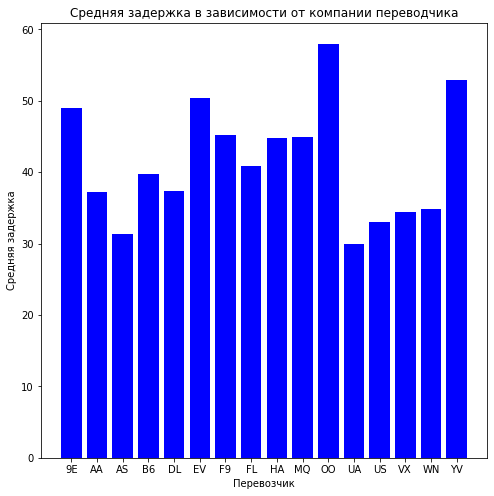

In [178]:
#6.1) средняя задержка в зависимости от компании переводчика

plt.figure(figsize=(8,8))
a = flights[flights.dep_delay > 0].groupby('carrier')['dep_delay'].mean()
plt.bar(np.arange(len(flights['carrier'].unique())), a, color = 'blue')
plt.xticks(np.arange(len(flights['carrier'].unique())), ('9E','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OO','UA','US','VX','WN','YV'))
plt.title('Средняя задержка в зависимости от компании переводчика')
plt.xlabel('Перевозчик')
plt.ylabel('Средняя задержка')
plt.show()

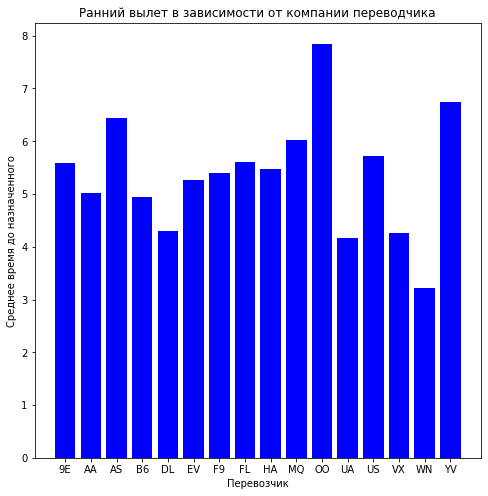

In [179]:
#6.2) средний ранний вылет в зависимости от компании переводчика

plt.figure(figsize=(8,8))
a = flights[flights.dep_delay < 0].groupby('carrier')['dep_delay'].mean()
plt.bar(np.arange(len(flights['carrier'].unique())), a.abs(), color = 'blue')
plt.xticks(np.arange(len(flights['carrier'].unique())), ('9E','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OO','UA','US','VX','WN','YV'))
plt.title('Ранний вылет в зависимости от компании переводчика')
plt.xlabel('Перевозчик')
plt.ylabel('Среднее время до назначенного')
plt.show()

In [ ]:
#Вывод6: OO и YV самый непунктуальный перевозчик.

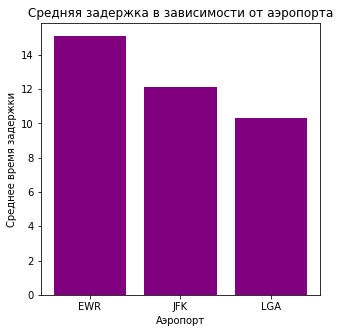

In [183]:
#7) среднее время задержки в зависимости от аэропорта
plt.figure(figsize=(5,5))
a = flights.groupby('origin')['dep_delay'].mean()
plt.bar(np.arange(3), a, color = 'purple')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Средняя задержка в зависимости от аэропорта')
plt.xlabel('Аэропорт')
plt.ylabel('Среднее время задержки')
plt.show()

In [ ]:
#Вывод7: Самый пунтуальный аэропорт Нью-Йорка LGA, самы непунктуальный - EWR.

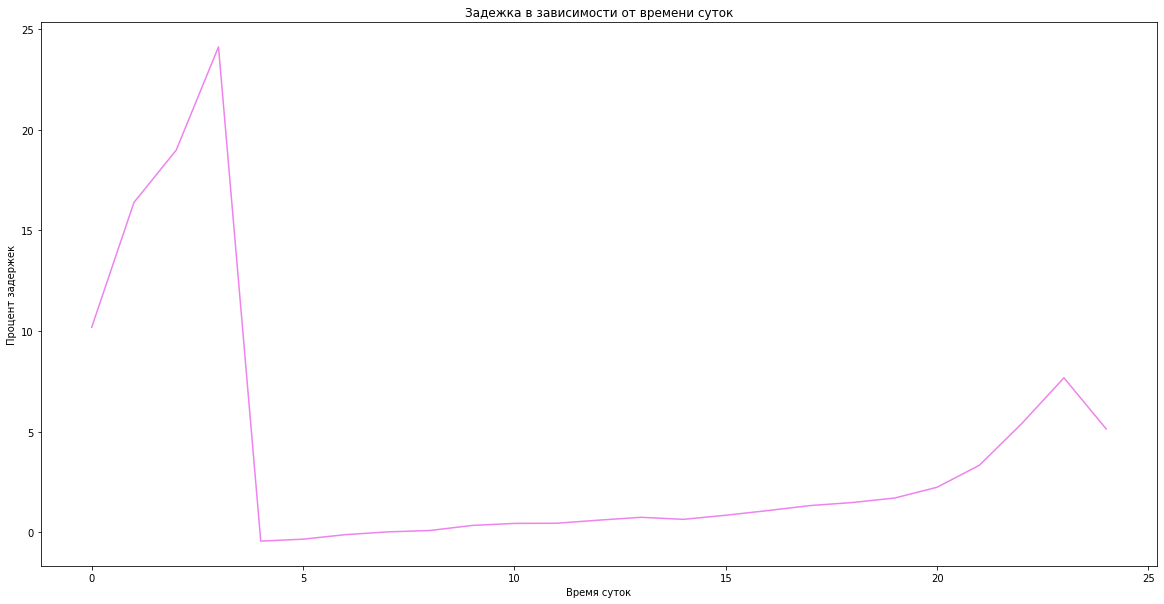

In [216]:
# Зависимость средней задержки от времени суток

plt.figure(figsize=(20,10))
a = flights.groupby('hour')['dep_delay'].mean()/flights['dep_delay'].mean()
plt.plot(np.arange(25),a,color='violet')
plt.title('Задежка в зависимости от времени суток')
plt.xlabel('Время суток')
plt.ylabel('Процент задержек')
plt.show()

In [ ]:
#Вывод8: самые большие задержки происходят в ночное время.

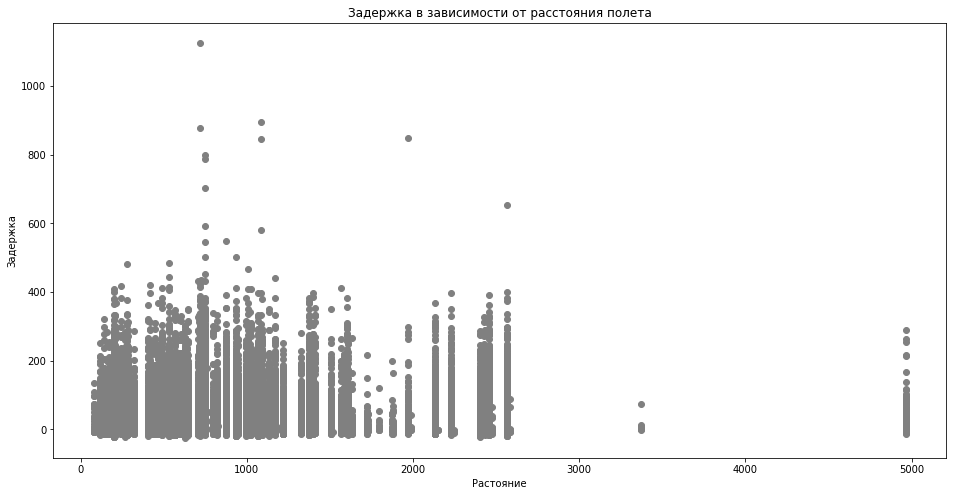

In [241]:
#9) задержка в зависимости от расстояния полета
plt.figure(figsize=(16,8))
plt.scatter(flights['distance'], flights['dep_delay'],color='gray')
plt.title('Задержка в зависимости от расстояния полета')
plt.xlabel('Растояние')
plt.ylabel('Задержка')
plt.show()

In [ ]:
#Вывод9: явной зависимости от растояния полёта не наблюдается.

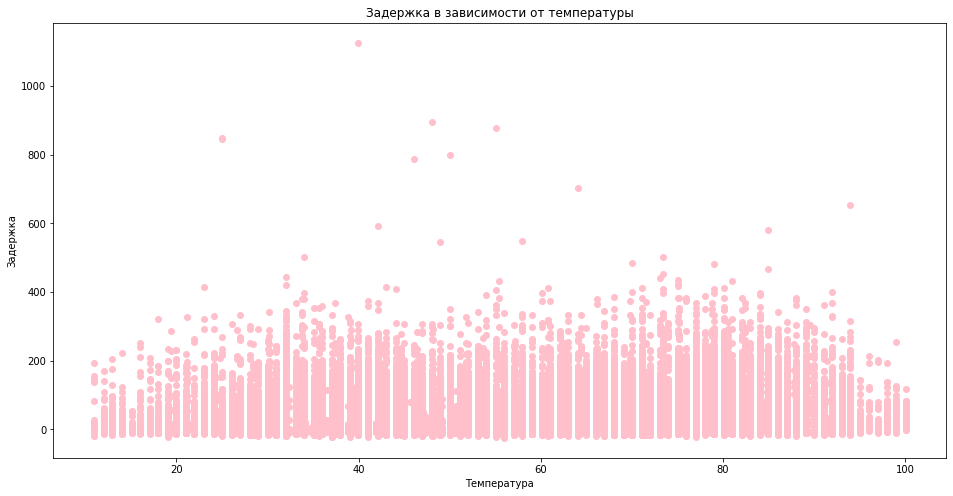

In [242]:
#10) задержка в зависимости от температуры
plt.figure(figsize=(16,8))
plt.scatter(flights['temp'], flights['dep_delay'],color='pink')
plt.title('Задержка в зависимости от температуры')
plt.xlabel('Температура')
plt.ylabel('Задержка')
plt.show()

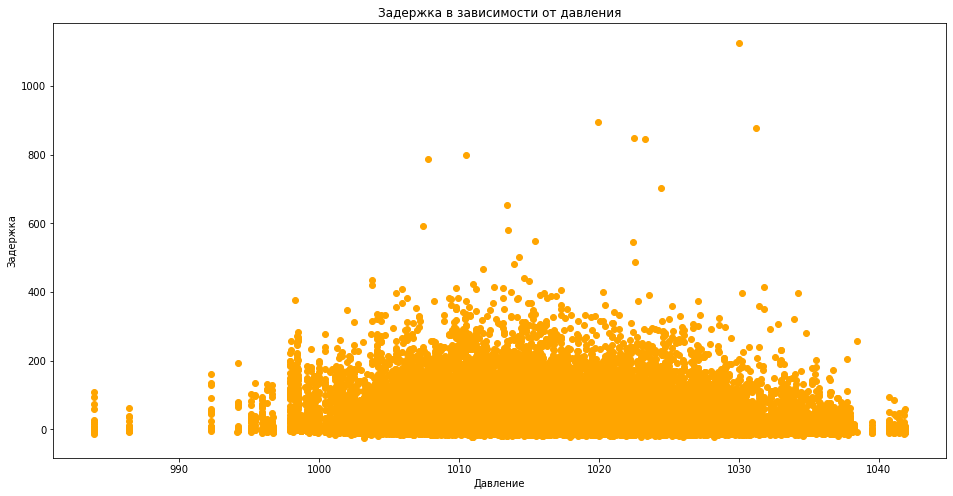

In [244]:
#10.1) задержка в зависимости от давления
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

plt.figure(figsize=(16,8))
plt.scatter(flights['pressure'], flights['dep_delay'],color='orange')
plt.title('Задержка в зависимости от давления')
plt.xlabel('Давление')
plt.ylabel('Задержка')
plt.show()

In [ ]:
#Вывод10: явной зависимости от давления и температуры не наблюдается.